# Dimensionality reduction

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import random
from sklearn import datasets

## PCA

Principal component analysis is an unsupervised learning method that tries to detect the directions in which the vector formed data varies most

import data of digits in black and white colors. 

In [2]:
digits = datasets.load_digits()
x_digits, y_digits = digits.data, digits.target

Let's start by visualizing our data. Fetch the first 10 numbers. 

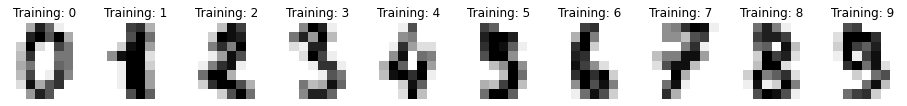

In [3]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(16, 5))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

__TO DO__: return the shape of x_digits

In [4]:
# Task
x_digits.shape

(1797, 64)

There are 1797 numbers represented by 8 x 8 matrices with the color intensity for each pixel. These are flattened a vector of 64 numbers

Our data has 64 dimensions, but we are going to reduce it to only 2 and see that, even with just 2 dimensions, we can clearly see that digits separate into clusters.

__TO DO__: 
- import PCA from scikit-learns decomposition module
- fit_transform PCA() model with n_components = 2 on x_digits and assign the result to the variable x_reduced

In [5]:
# Task

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_reduced = pca.fit_transform(x_digits)

if we plot the reduced 2D feature space we see that similar numbers are close to each other

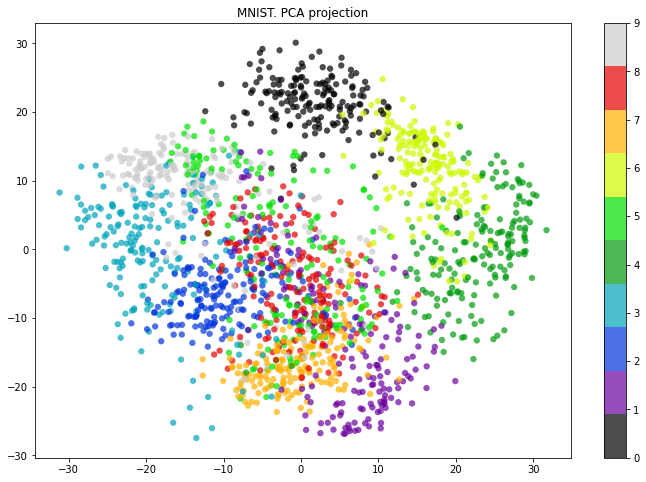

In [6]:
plt.figure(figsize=(12,8))
plt.scatter(x_reduced[:, 0], x_reduced[:, 1], c=y_digits, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection');

In practice, we would choose the number of principal components such that we can explain e.g. 90% of the initial data dispersion (via the explained_variance_ratio_). 

__TO DO__: 
- return the explained variance ratio with PCA()'s attribute explained_variance_ratio_.  
Each value returns the percentage of variance explained by each of the selected components. 
- How much variance did we explain with the first two components?

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [7]:
# Task

print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

[0.14890594 0.13618771]
0.2850936482366727


The length of the returned array is equal to n_components. If n_components is not set, then all components are stored and the sum of the ratios is equal to 1.0.

In order to get 90% explained variance we would have to retain 20 principal components. Run the code below to see.

20


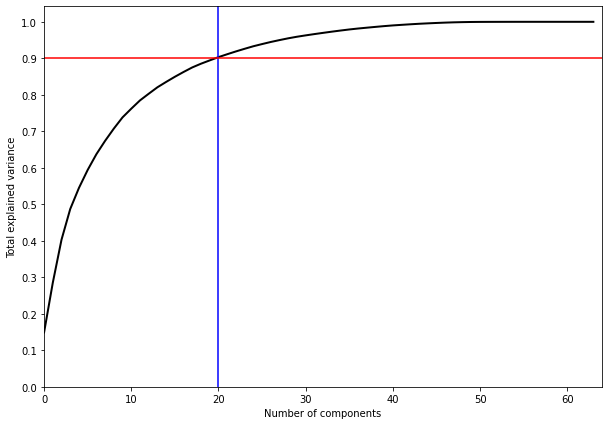

In [8]:
pca = PCA().fit(x_digits)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, x_digits.shape[1])
plt.yticks(np.arange(0, 1.1, 0.1))
min_variance = 0.9
min_components = np.min(np.where(np.cumsum(pca.explained_variance_ratio_) > min_variance))
print(min_components)
plt.axvline(min_components, c='b')
plt.axhline(min_variance, c='r')
plt.show()

__scaling__

In the MNIST dataset all the features have the same scale so the PCA algorithm is not impacted by different scales. 

While many algorithms (such as SVM, K-nearest neighbors, and logistic regression) require features to be normalized, intuitively we can think of Principle Component Analysis (PCA) as being a prime example of when normalization is important. In PCA we are interested in the components that maximize the variance. If one component (e.g. human height) varies less than another (e.g. weight) because of their respective scales (meters vs. kilos), PCA might determine that the direction of maximal variance more closely corresponds with the ‘weight’ axis, if those features are not scaled. As a change in height of one meter can be considered much more important than the change in weight of one kilogram, this is clearly incorrect.

In [9]:
from sklearn.datasets import load_wine

wine = load_wine()
x_wine = wine.data
y_wine = wine.target
cols_wine = wine.feature_names
df_wine = pd.DataFrame(x_wine, columns = cols_wine)

__TO DO__: use a describe() method on df_wine to see standard deviations, quartiles and other descriptive statistics of the columns. 

In [10]:
# Task

df_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


notice that the scales of the features are different e.g. proline is in magnitude of hundreds, magnesium in tens, other are even smaller

__TO DO__: 
- fit_tranform the PCA with 2 components on the x_wine
- return the reduced data set with 2 features and assign to the variable _x_reduced_
- print the components of the pca with components_ attribute

In [11]:
# Task

pca_unscaled = PCA(n_components=2)
x_reduced = pca_unscaled.fit_transform(x_wine)
pca_unscaled.components_

array([[ 1.65926472e-03, -6.81015556e-04,  1.94905742e-04,
        -4.67130058e-03,  1.78680075e-02,  9.89829680e-04,
         1.56728830e-03, -1.23086662e-04,  6.00607792e-04,
         2.32714319e-03,  1.71380037e-04,  7.04931645e-04,
         9.99822937e-01],
       [ 1.20340617e-03,  2.15498184e-03,  4.59369254e-03,
         2.64503930e-02,  9.99344186e-01,  8.77962152e-04,
        -5.18507284e-05, -1.35447892e-03,  5.00440040e-03,
         1.51003530e-02, -7.62673115e-04, -3.49536431e-03,
        -1.77738095e-02]])

__TO DO__: 
- use StandardScaler() to scale (fit_transform) the x_wine and store it to x_wine_scaled variable
- fit_transform the PCA with 2 components on the scaled data
- return the reduced data set with 2 features and assign it to the variable x_reduced_scaled
- print the components of the pca with components_ attribute

In [12]:
# Task

x_wine_scaled = StandardScaler().fit_transform(x_wine)
pca_scaled = PCA(n_components=2)
x_reduced_scaled = pca_scaled.fit_transform(x_wine_scaled)
print(pca_scaled.components_)

[[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
   0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
  -0.36490283]]


observe above how the last value of the components in the unscaled case was by cca 2 magnitudes larger than the other values of the components. In the scaled case the components have similar weights. You can see the results of the two PCAs in the chart below.

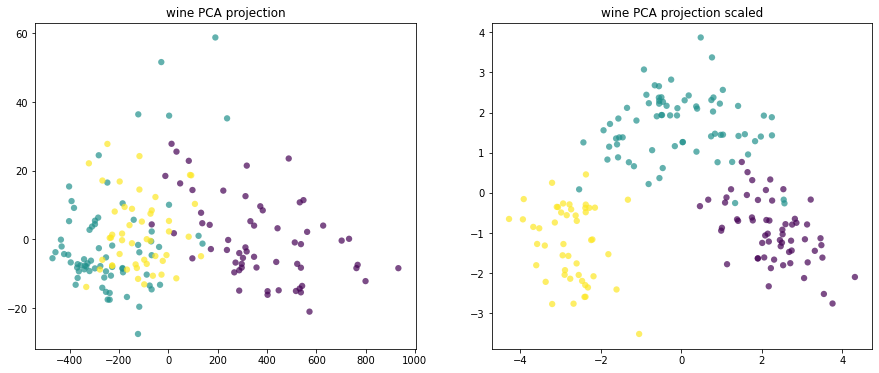

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15,6))

ax1.scatter(x_reduced[:, 0], x_reduced[:, 1], c=y_wine, 
            edgecolor='none', alpha=0.7, s=40)
ax1.set_title('wine PCA projection');

ax2.scatter(x_reduced_scaled[:, 0], x_reduced_scaled[:, 1], c=y_wine, 
            edgecolor='none', alpha=0.7, s=40)
ax2.set_title(f'wine PCA projection scaled');

Scaling helped to visualize the similar results close to each other. As a consequence scaling improves the performance of classifiers after dimensionality reduction.

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Optional part 

__TO DO__: use a train_test_split to split the x_wine, y_wine data into x_train, x_test, y_train, y_test

In [15]:
# Task

x_train, x_test, y_train, y_test = train_test_split(x_wine, y_wine, random_state=42)

Here we will make use of make_pipeline which constructs a pipeline from the given estimators. First we will apply PCA with 2 components to reduce dimensionality of the training data x_train and then apply RandomForestClassifier() with default parameters. We initialize PCA and RF in the pipeline and fit it to the training data.

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html

In [16]:
clf_unscaled = make_pipeline(PCA(2), RandomForestClassifier()) 
clf_unscaled.fit(x_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=2)),
                ('randomforestclassifier', RandomForestClassifier())])

Now we will predict the classes with the pipeline on a test dataset x_test and evaluate by comparing the predictions to true values from y_test

In [17]:
pred_test_unscaled = clf_unscaled.predict(x_test)
accuracy_score(y_test, pred_test_unscaled)

0.7111111111111111

__TO DO__:  repeat the same steps as in the previous two cells 
- make pipeline but now include additional estimator _StandardScaler()_ at the beginning of the pipeline. Assign the pipeline to the variable clf_scaled. In the example above you had 2 estimators (PCA(2) and RandomForestClassifier()). Now you will have 3 estimators. 
- fit the pipeline to the training data x_train and y_train
- use the predict() method of clf_scaled on the test data x_test and store the predictions to a variable pred_test_scaled
- print the accuracy of the pred_test_scaled compared to y_test

In [18]:
# Task

clf_scaled = make_pipeline(StandardScaler(), PCA(2), RandomForestClassifier())
clf_scaled.fit(x_train, y_train)
pred_test_scaled = clf_scaled.predict(x_test)
accuracy_score(y_test, pred_test_scaled)

0.9777777777777777

You can see that scaling improved the accuracy of the model significantly

## TSNE

TSNE is another dimensionality reduction method that works well for visualizing high-dimensional data. With t-sne you can get different results with different initializations. If the number of features is high t-sne can get quite slow. Here we select 2000 random samples from the mnist digits dataset and still t-sne takes much more time to complete than PCA. 

In [19]:
from sklearn.manifold import TSNE
from datetime import datetime as dt

__TO DO__: use TSNE with n_components = 2 and fit_transform the random 2000 examples from mnist data set that is stored in x_digits_flat_selected

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Timerun: 0:00:09.701330


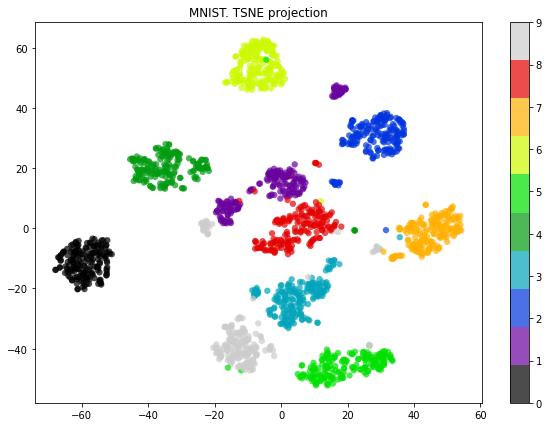

In [20]:
# Task

t1 = dt.now()
x_embedded = TSNE(n_components=2).fit_transform(x_digits)
plt.figure(figsize=(10,7))
plt.scatter(x_embedded[:, 0], x_embedded[:, 1], c=y_digits, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. TSNE projection');
print(f'Timerun: {dt.now()-t1}')

With t-SNE, the picture looks better since PCA has a linear constraint while t-SNE does not. Details of the algorithm are for further reading. 

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

## Autoencoders

In [27]:
!cp ~/work/2_virtual_classroom_materials/day_5_supervised_unsupervised_learning/2_unsupervised_learning/data/mnist.npz ~/.keras/datasets/mnist.npz

In [24]:
import tensorflow as tf

(x_digits, y_digits), (_, _) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

# if you have problems with RAM memory run the 3 lines below that will select just a subset of the data
# idxs_ = random.sample(range(x_digits.shape[0]), 10000)
# x_digits = x_digits[idxs_]
# y_digits = y_digits[idxs_]

Let's start by visualizing our data. Fetch the first 10 numbers. 

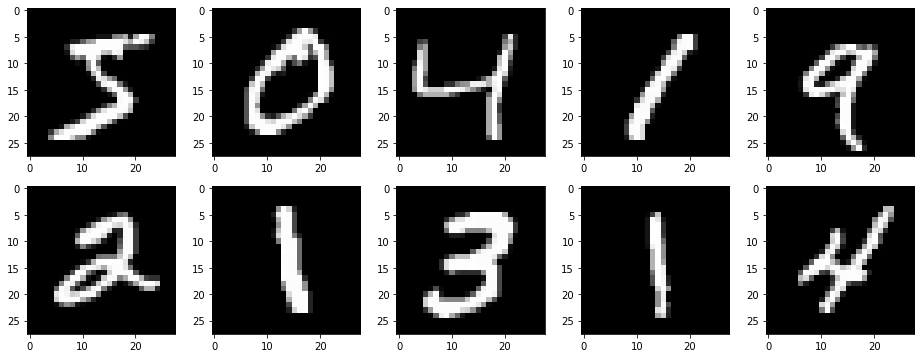

In [28]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_digits[i,:].reshape([28,28]), cmap='gray');

__TO DO__: return the shape of x_digits

In [29]:
# Task

x_digits.shape

(60000, 28, 28)

There are 60.000 numbers represented by 28 x 28 matrices with the color intensity for each pixel. We need to flatten every matrix into a vector of 28x28 numbers. We will use .reshape() function that gives a new shape to an array without changing its data

https://numpy.org/doc/stable/reference/generated/numpy.reshape.html

In [30]:
x_digits_flat = x_digits.reshape(x_digits.shape[0], x_digits.shape[1]*x_digits.shape[2]) # reshaping matrices into vectors
x_digits_flat.shape

(60000, 784)

compile the encoder decoder architecture stacked sequentially (autoencoder) using keras. if it is not installed you will have to install keras either with pip or conda. just execute the code and read comments. learning keras is out of scope of this lecture

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD, Adam
import seaborn as sns

X_train = x_digits/255.0 # digits matrices are scaled to values between 0 and 1
 
### Encoder
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))   # flatten the input matrices into vectors of 28x28
encoder.add(Dense(400,activation="relu"))   # add a dense layer with 400 neurons and relu activation
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(2,activation="relu"))     # add a dense layer with 2 neurons and relu activation
 
### Decoder
decoder = Sequential()
decoder.add(Dense(50,input_shape=[2],activation='sigmoid'))  # decoder will start with an input of dimension 2 from an encoder
decoder.add(Dense(100,activation='sigmoid'))
decoder.add(Dense(200,activation='sigmoid'))
decoder.add(Dense(400,activation='sigmoid'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))           # reshape the output from a flat vector to matrix of 28x28 
 
### Autoencoder
autoencoder = Sequential([encoder,decoder]) # stack encoder and decoder sequentially
autoencoder.compile(loss="mse", optimizer='Adam') # compile the model

2022-03-28 14:53:10.317316: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-28 14:53:10.317372: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-28 14:53:10.317404: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (21099d30f8a5): /proc/driver/nvidia/version does not exist
2022-03-28 14:53:10.318931: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


__TO DO__: fit the compiled autoencoder model as you are used from scikit learn. as x use X_train and as y use X_train again, specify number of epochs with parameter epochs=5

In [32]:
# Task

autoencoder.fit(X_train,X_train,epochs=5)

2022-03-28 14:53:48.833700: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.
2022-03-28 14:53:53.636078: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0681
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0648
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0538
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0506
Epoch 5/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0493


__TO DO__: use a predict() method of the encoder on X_train and assign the result to x_reduced

In [33]:
# Task

x_reduced = encoder.predict(X_train) 

2022-03-28 14:55:32.976465: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


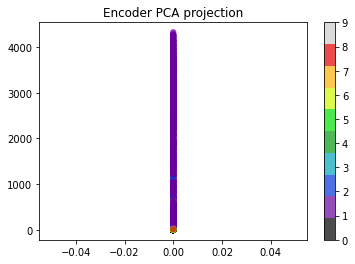

In [34]:
plt.scatter(x_reduced[:, 0], x_reduced[:, 1], c=y_digits, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('Encoder PCA projection');

After training with 5 epochs the result does not look very promising. However, if you let the model learn for 50 epochs you should get the result as shown on image below. 

<img src="../img/encoder.PNG">

Material adapted for RBI internal purposes with full permissions from original authors. [Source](https://github.com/zatkopatrik/authentic-data-science)